In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [47]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We have data to find from Mushroom data Edible or Poisonous First import data with this command PD.READ_CSV method, as we know it is a categorical data there is two class Edible or Poisonous.

# Exploratory Data Analysis EDA

In [48]:
data.shape

(8124, 23)

We have 8124 rows and 23 columns

In [49]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All data is in string fromat(Object type)

In [50]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

With the help of this command we get all columns name wise.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There is no Null value in our data and all data is in object dtype.

In [52]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

there is no Missing value in our data

<AxesSubplot:>

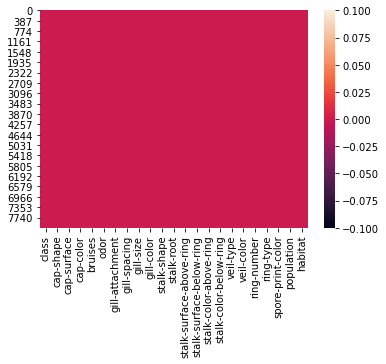

In [53]:
sns.heatmap(data.isnull())

sns.heatmap(df.isnull()) this function provide us how much missing value present in our data graphically and there are no missing value at present.

In [54]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)

    return le.transform(feat)

In [55]:
for col in data.columns:
    data[str(col)] = label_encoded(data[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In this data file all data is string data(categorical data) and as we know we should numerical data for data analysis and also for model building so we have to Encode all data with the help of LabelEncoder.

In [56]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Summary Statistics

In [57]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


data.describe function provide us statistical information about data and with the help of this we are able to understand structure of data with different senerio.

In [58]:
pd.concat({'unique values': data.apply(pd.unique), 'number of unique values': data.nunique()}, axis=1)

,unique values,number of unique values
class,"[1, 0]",2
cap-shape,"[5, 0, 4, 2, 3, 1]",6
cap-surface,"[2, 3, 0, 1]",4
cap-color,"[4, 9, 8, 3, 2, 5, 0, 7, 1, 6]",10
bruises,"[1, 0]",2
odor,"[6, 0, 3, 5, 2, 1, 8, 7, 4]",9
gill-attachment,"[1, 0]",2
gill-spacing,"[0, 1]",2
gill-size,"[1, 0]",2
gill-color,"[4, 5, 2, 7, 10, 3, 9, 1, 0, 8, 11, 6]",12


How much unique values in each columns

In [59]:
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In Target column 0 comes 4208 times and 1 comes 3916 times.

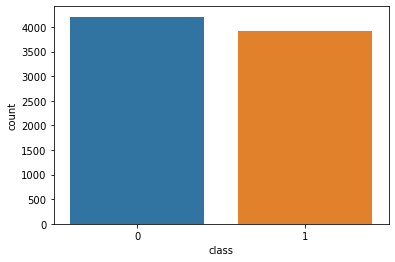

In [60]:
sns.countplot(data['class']);

There is no data imbalance problems in Class column.

In [61]:
data.drop('veil-type',axis=1,inplace=True)

# Data Visualization

# Correlation

<AxesSubplot:>

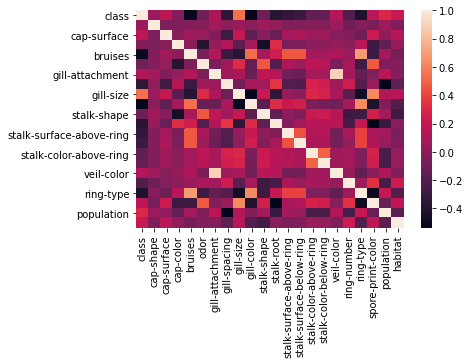

In [62]:
dfcor=data.corr()
dfcor
sns.heatmap(dfcor)

<AxesSubplot:>

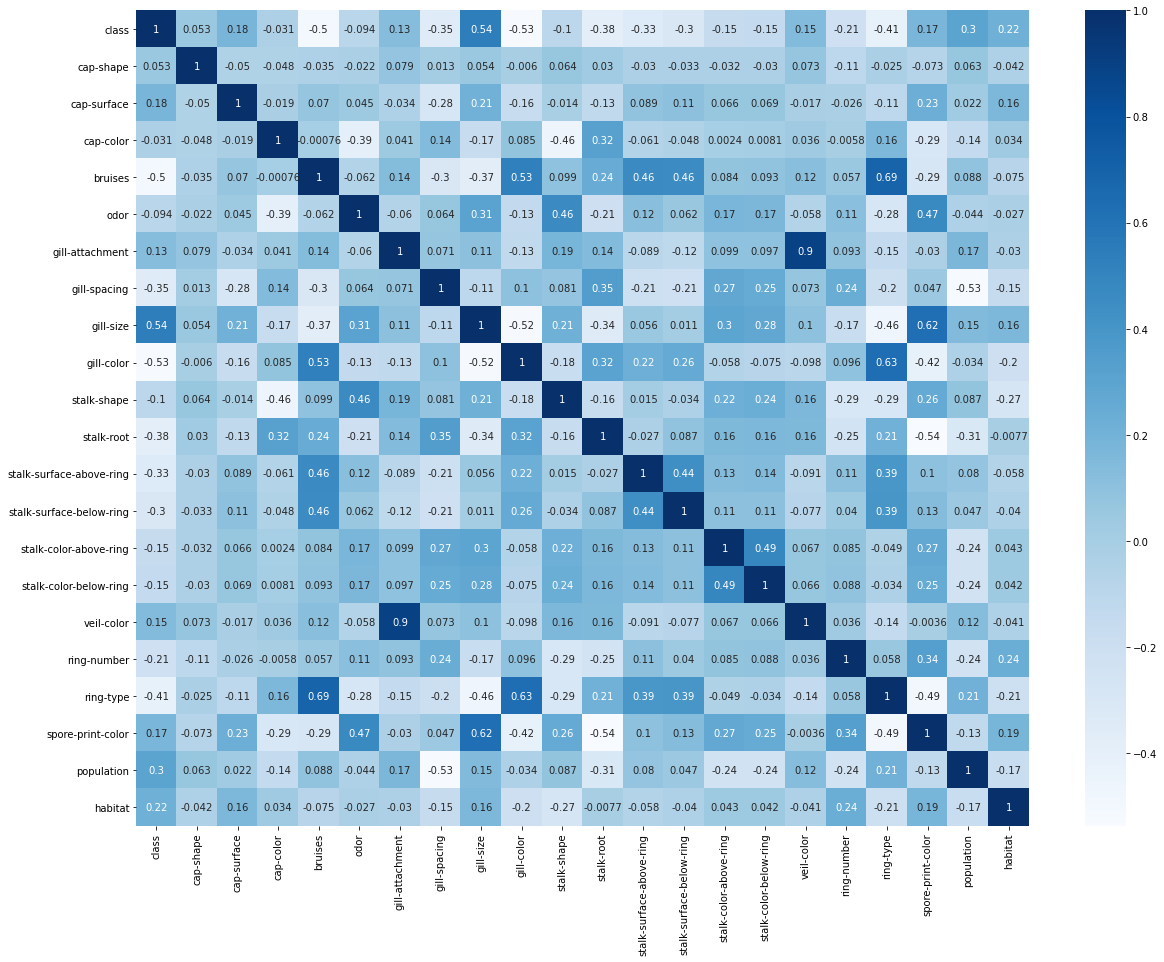

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Correlation Between all columns. With the help of correlation we can correlate one column with other one.

# Ploting Outliers by Box Plot

# Univariate Analysis

<AxesSubplot:>

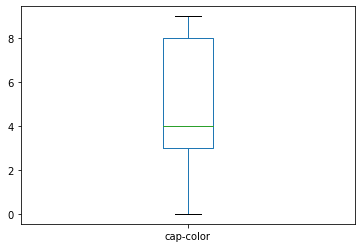

In [64]:
data['cap-color'].plot.box()

In cap-color no outlier is present.

<AxesSubplot:>

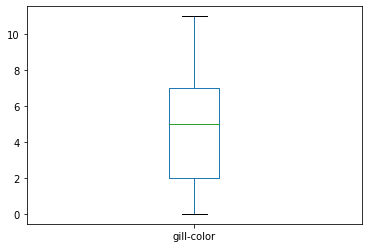

In [65]:
data['gill-color'].plot.box()

No outlier present in Gill Color column

<AxesSubplot:>

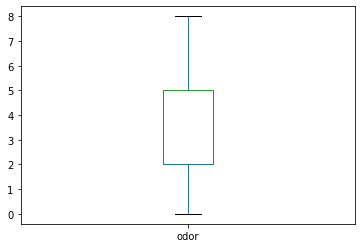

In [66]:
data['odor'].plot.box()

No outlier present in Odor column

<AxesSubplot:>

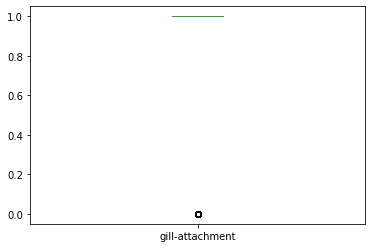

In [67]:
data['gill-attachment'].plot.box()

Few outlier is there in this columns but it is so far.

<AxesSubplot:>

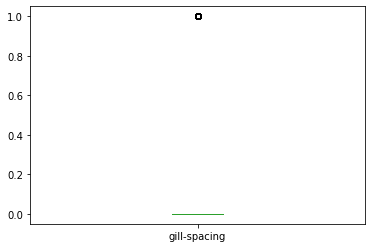

In [68]:
data['gill-spacing'].plot.box()

Few outlier is there in this columns but it is also so far.

<AxesSubplot:>

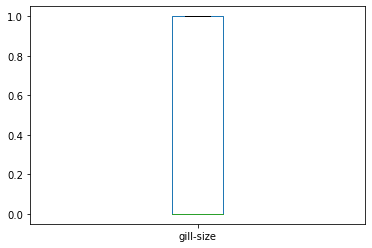

In [69]:
data['gill-size'].plot.box()

there is no outlier in this column.

<AxesSubplot:>

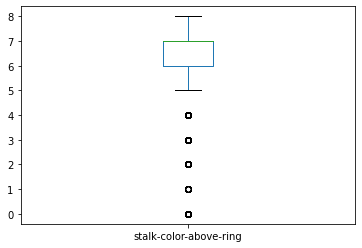

In [70]:
data['stalk-color-above-ring'].plot.box()

In this box plot outlier is present and we have to clean them.

<AxesSubplot:>

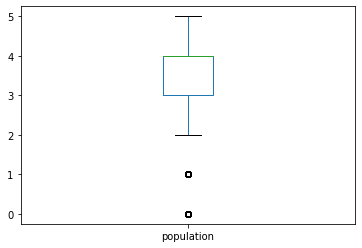

In [71]:
data['population'].plot.box()

Few outliers are there.

<AxesSubplot:>

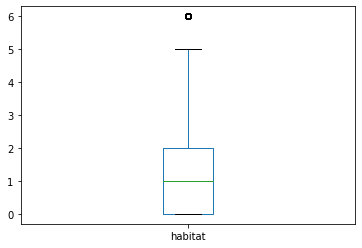

In [72]:
data['habitat'].plot.box()

In habitat column few outlier is present but it is so far it is not impacting on data.

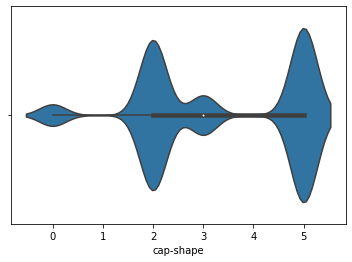

In [73]:
sns.violinplot(x='cap-shape',data=data)
plt.show()

With the help of violinplot plot Cap-shape column.

{'bodies': [<matplotlib.collections.PolyCollection at 0x17f753604c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17f75360dc0>,
 'cmins': <matplotlib.collections.LineCollection at 0x17f75360d90>,
 'cbars': <matplotlib.collections.LineCollection at 0x17f75360790>}

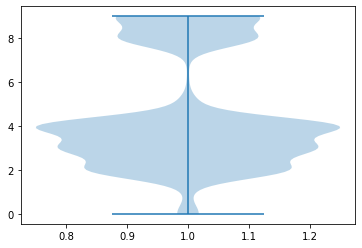

In [74]:
plt.violinplot(data['cap-color'])

Maximum data divided between 2 to 6. 

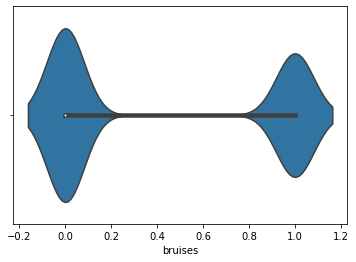

In [75]:
sns.violinplot(x='bruises',data=data)
plt.show()

Bruises column with the help of violineplot and maximum data is 0 and few is 1

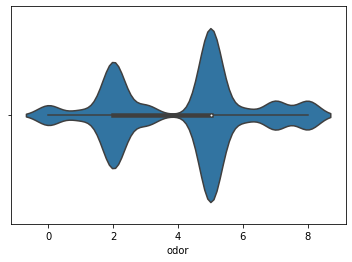

In [76]:
sns.violinplot(x='odor',data=data)
plt.show()

Odor columns plot with the help of violinplot. 

gill-attachment columns plot with the help of violinplot and maximum data is 1 and very less in 0.

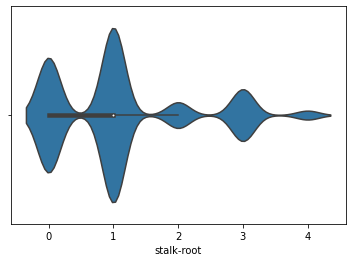

In [77]:
sns.violinplot(x='stalk-root',data=data)
plt.show()

stalk-root column plot with the help of violinplot.

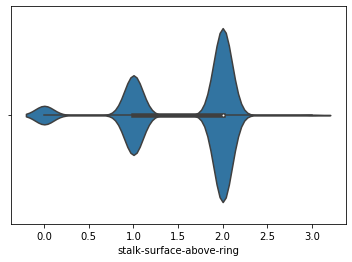

In [78]:
sns.violinplot(x='stalk-surface-above-ring',data=data)
plt.show()

stalk surface above ring column plot with the help of violinplot and varience present in this column.

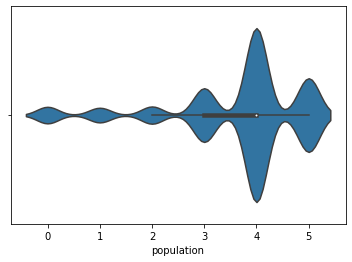

In [79]:
sns.violinplot(x='population',data=data)
plt.show()

Populatin column plot with the help of violinplot.

# Bivariate Analysis

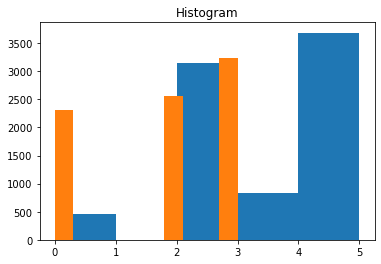

In [80]:
plt.hist(data['cap-shape'],bins=5)
plt.hist(data['cap-surface'],bins=10)
plt.title('Histogram')
plt.show()

Cap-shape and Cap-surface plot with the help of histogram.

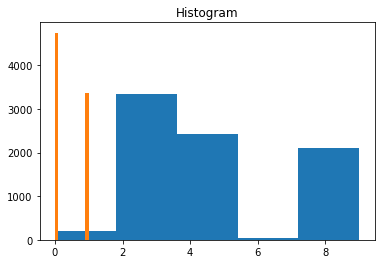

In [81]:
plt.hist(data['cap-color'],bins=5)
plt.hist(data['bruises'],bins=10)
plt.title('Histogram')
plt.show()

Between both column high varience is present.

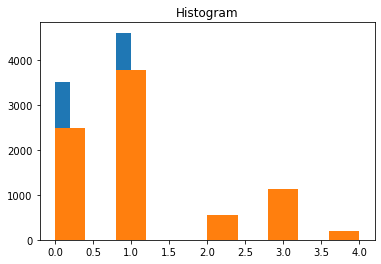

In [82]:
plt.hist(data['stalk-shape'],bins=5)
plt.hist(data['stalk-root'],bins=10)
plt.title('Histogram')
plt.show()

Stalk-shape and Stalk-root column plot with the help of histogram.

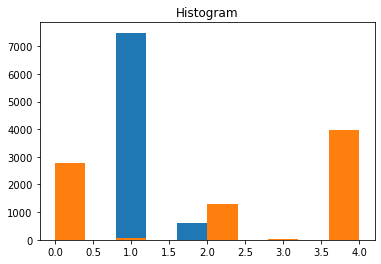

In [83]:
plt.hist(data['ring-number'],bins=5)
plt.hist(data['ring-type'],bins=10)
plt.title('Histogram')
plt.show()

Hight varience present between both column as we are getting with the help of histogram.

{'bodies': [<matplotlib.collections.PolyCollection at 0x17f76e9acd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17f76e9ab50>,
 'cmins': <matplotlib.collections.LineCollection at 0x17f76eaa1c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x17f76eaa4c0>}

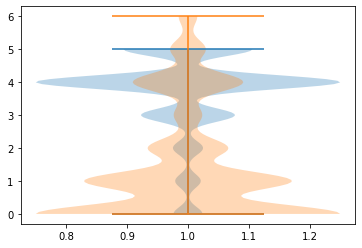

In [84]:
plt.violinplot(data['population'])
plt.violinplot(data['habitat'])

Population and Habitat plot by violinplot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


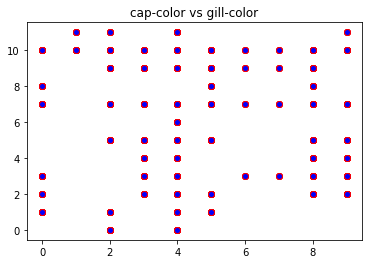

In [85]:
plt.scatter(data['cap-color'],data['gill-color'],alpha=0.9,c=(0,0,1),edgecolors='r')
plt.title('cap-color vs gill-color')
plt.show()

Two column compair each other with the help of scatterplot to check scattered data

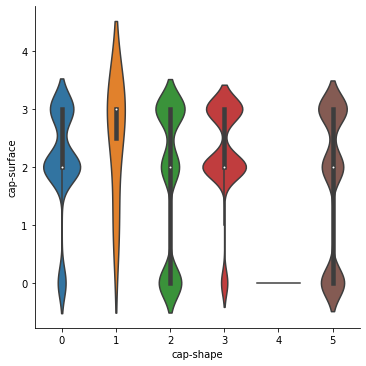

In [86]:
g = sns.catplot(x="cap-shape", y="cap-surface",
               data=data, kind="violin")

violinplot of two different columns.

# Multivariate Anaysis

In [87]:
collist=data.columns.values
ncol=22
nrows=15

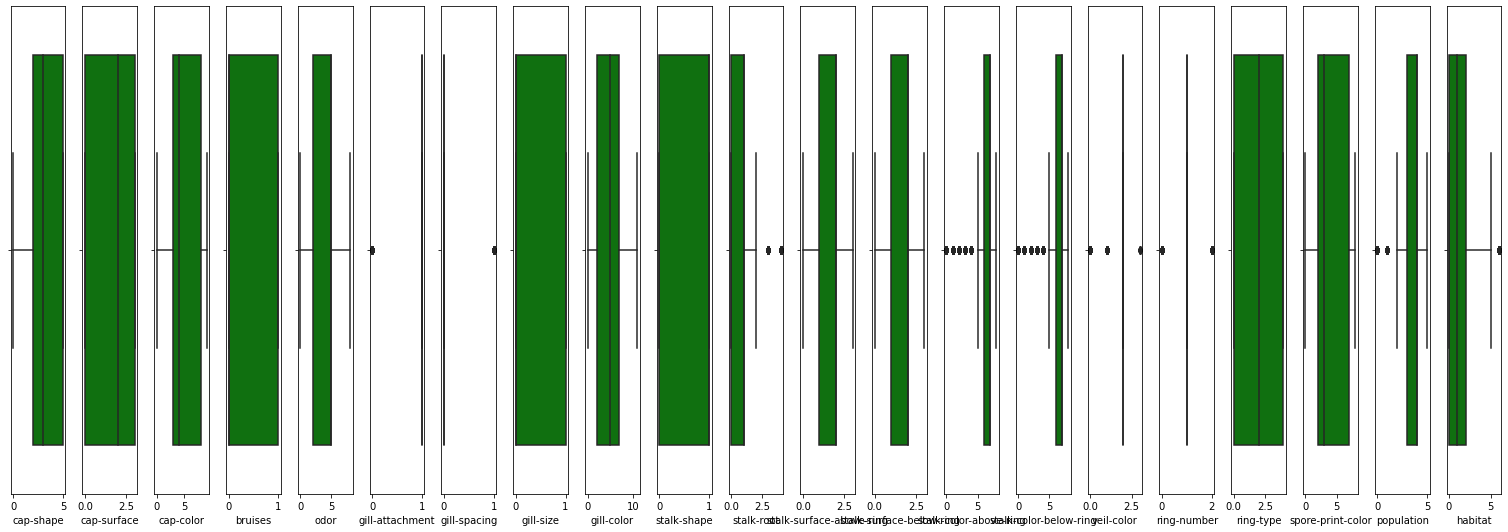

In [88]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find outliers in a one place.

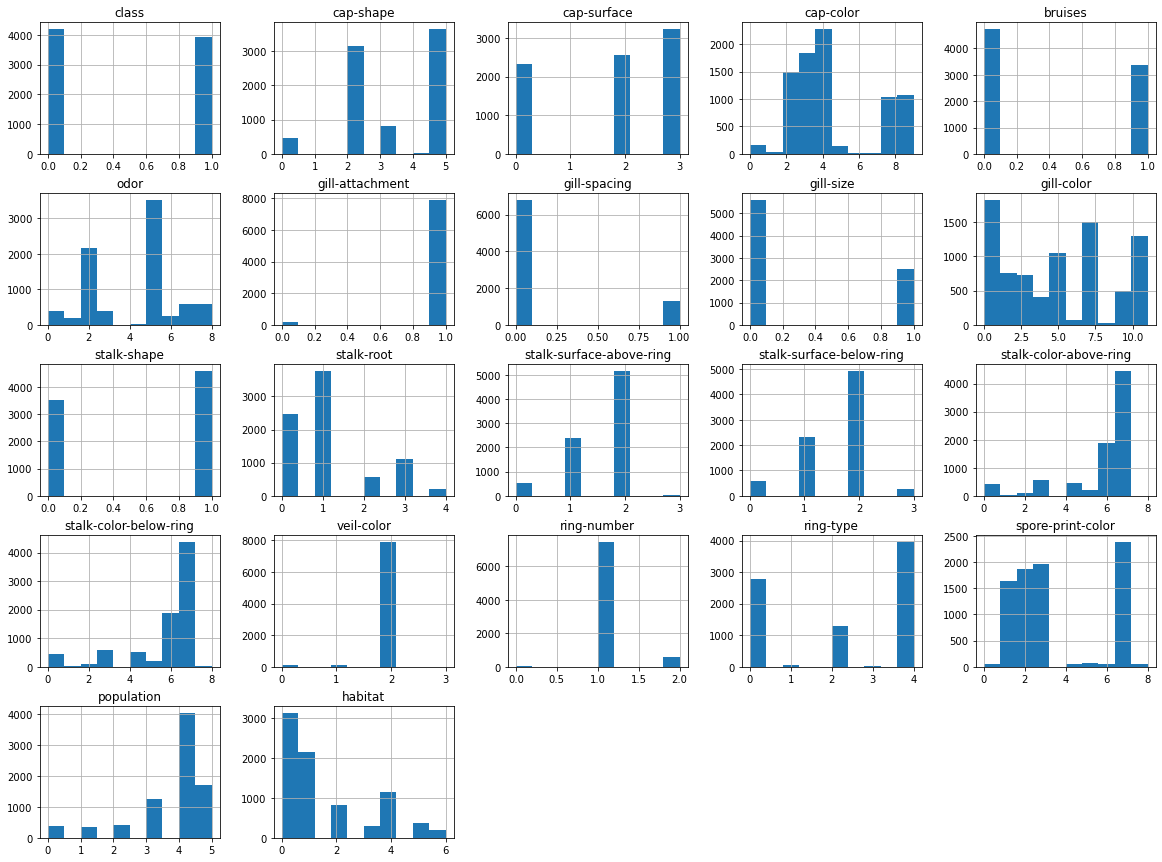

In [89]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

Ploting all columns by Histogram to check all data in a one place.

In [90]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

Before spliting all data into Dependent and Independent variable.

In [91]:
y= data['class']
x= data.drop('class', axis=1)

Spliting all data for train test split to train model into x and y.

In [92]:
y.shape

(8124,)

Check shape after split target variable.

In [93]:
x.shape

(8124, 21)

Check shape after split dependent variable

# ZSCORE VALUE

In [94]:
from scipy.stats import zscore

In [95]:
z=np.abs(zscore(x))
z

array([[1.02971224, 0.14012794, 0.19824983, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [1.02971224, 0.14012794, 1.76587407, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [2.08704716, 0.14012794, 1.37304929, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.8403434 , 0.14012794, 0.19824983, ..., 1.50964337, 2.11182722,
        0.28570978],
       [0.21699152, 0.95327039, 0.19824983, ..., 1.42842641, 0.28432981,
        0.28570978],
       [1.02971224, 0.14012794, 0.19824983, ..., 0.16925365, 2.11182722,
        0.28570978]])

Applying Zscore value to entire data for removing outliters form data.

In [96]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([14, 13, 14, ..., 15,  5, 15], dtype=int64))


Set Threshold point to data.

In [97]:
z[1816][14]

3.0383605317184252

In [98]:
z[2128][13]

3.058610708783329

With the help of above mentioned command it is provide us value that is above 3 threshold point.

In [99]:
xd=x[(z<3).all(axis=1)]
xd

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,3,3,2,0,8,1,0,1,0,1,...,1,1,6,6,2,1,0,7,4,0
8116,3,3,4,0,7,1,0,1,0,1,...,2,1,6,7,2,1,0,7,4,2
8117,3,2,2,0,8,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,0
8118,3,3,4,0,2,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,0


with the help of above mentioned function provide us all value that is below threshold point.

In [100]:
xd.shape

(6568, 21)

checking shape after apply Zscore value.

In [101]:
x.shape

(8124, 21)

checking shape after apply Zscore value.

In [102]:
(1556/8124)*100

19.15312653865091

Zscore value use to remove outliers but if we apply zscore value approx 19%  of data we are loosing.

In [103]:
q1=x.quantile(0.25)
q1

cap-shape                   2.0
cap-surface                 0.0
cap-color                   3.0
bruises                     0.0
odor                        2.0
gill-attachment             1.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  2.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    1.0
stalk-surface-below-ring    1.0
stalk-color-above-ring      6.0
stalk-color-below-ring      6.0
veil-color                  2.0
ring-number                 1.0
ring-type                   0.0
spore-print-color           2.0
population                  3.0
habitat                     0.0
Name: 0.25, dtype: float64

In Q1 we divide data from 25% quantile.

In [104]:
q3=x.quantile(0.75)
q3

cap-shape                   5.0
cap-surface                 3.0
cap-color                   8.0
bruises                     1.0
odor                        5.0
gill-attachment             1.0
gill-spacing                0.0
gill-size                   1.0
gill-color                  7.0
stalk-shape                 1.0
stalk-root                  1.0
stalk-surface-above-ring    2.0
stalk-surface-below-ring    2.0
stalk-color-above-ring      7.0
stalk-color-below-ring      7.0
veil-color                  2.0
ring-number                 1.0
ring-type                   4.0
spore-print-color           7.0
population                  4.0
habitat                     2.0
Name: 0.75, dtype: float64

In Q3 we divide data upto 75% for removing outliers.

In [105]:
IQR=q3-q1
IQR

cap-shape                   3.0
cap-surface                 3.0
cap-color                   5.0
bruises                     1.0
odor                        3.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   1.0
gill-color                  5.0
stalk-shape                 1.0
stalk-root                  1.0
stalk-surface-above-ring    1.0
stalk-surface-below-ring    1.0
stalk-color-above-ring      1.0
stalk-color-below-ring      1.0
veil-color                  0.0
ring-number                 0.0
ring-type                   4.0
spore-print-color           5.0
population                  1.0
habitat                     2.0
dtype: float64

Q3-Q1

In [106]:
print((x<(q1-(1.5*IQR)))|(x>(q3+(1.5*IQR))))

      cap-shape  cap-surface  cap-color  bruises   odor  gill-attachment  \
0         False        False      False    False  False            False   
1         False        False      False    False  False            False   
2         False        False      False    False  False            False   
3         False        False      False    False  False            False   
4         False        False      False    False  False            False   
...         ...          ...        ...      ...    ...              ...   
8119      False        False      False    False  False             True   
8120      False        False      False    False  False             True   
8121      False        False      False    False  False             True   
8122      False        False      False    False  False            False   
8123      False        False      False    False  False             True   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0            False      

with the help of threshold function provide us all value that is below threshold point.

In [107]:
x_new=x[(z<3).all(axis=1)]

In x_new variable we saving all value that is below (3) threshold point.

In [108]:
x_new.shape

(6568, 21)

checking dependent variable shape after apply quantile functionality.

In [109]:
(1556/8124)*100

19.15312653865091

Use IQR functionlity to remove outliers but if we apply IQR then we approx 19% of data we are loosing.

In [110]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Checking skewness.

<AxesSubplot:xlabel='cap-shape', ylabel='Density'>

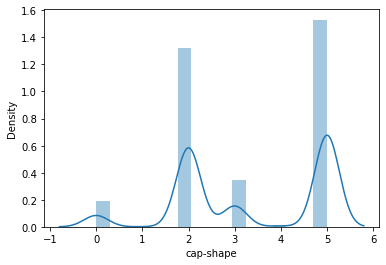

In [111]:
sns.distplot(data['cap-shape'])

With the help of distplot ploting Cap-shape to check skewness, as we are getting there are many peak in this column.

<AxesSubplot:xlabel='cap-surface', ylabel='Density'>

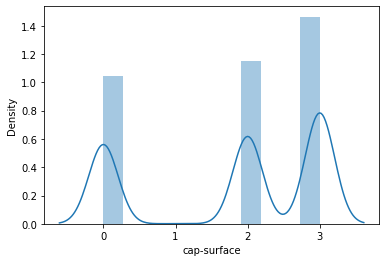

In [112]:
sns.distplot(data['cap-surface'])

With the help of distplot ploting Cap-surface to check skewness, as we are getting there are many peak in this column.

<AxesSubplot:xlabel='cap-color', ylabel='Density'>

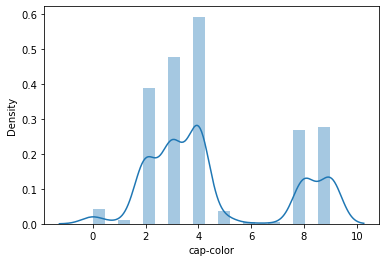

In [113]:
sns.distplot(data['cap-color'])

With the help of distplot ploting Cap-color to check skewness, as we are getting there are many peak in this column.

<AxesSubplot:xlabel='odor', ylabel='Density'>

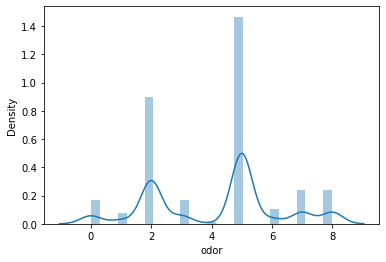

In [114]:
sns.distplot(data['odor'])

With the help of distplot ploting odor to check skewness, as we are getting there are many peak in this column.

<AxesSubplot:xlabel='gill-attachment', ylabel='Density'>

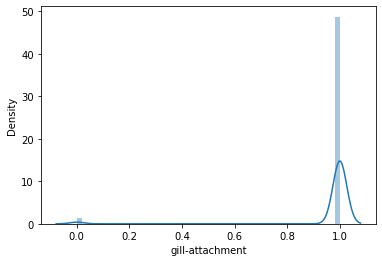

In [115]:
sns.distplot(data['gill-attachment'])

With the help of distplot ploting gill-attachment to check skewness, as we are getting there is right skew data asymetrical.

<AxesSubplot:xlabel='habitat', ylabel='Density'>

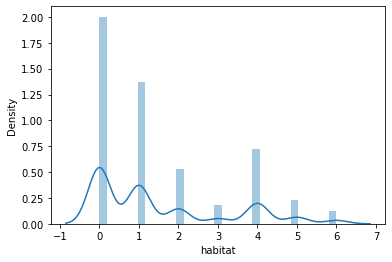

In [116]:
sns.distplot(data['habitat'])

With the help of distplot ploting habitat column to check skewness, as we are getting there are many peak in this column.

<AxesSubplot:xlabel='veil-color', ylabel='Density'>

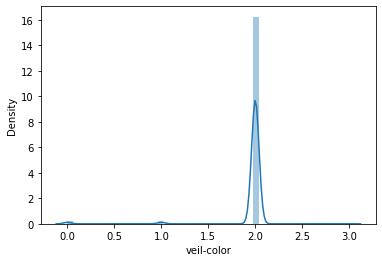

In [117]:
sns.distplot(data['veil-color'])

With the help of distplot ploting Cap-color to check skewness, as we are getting the data is not normally distributed.

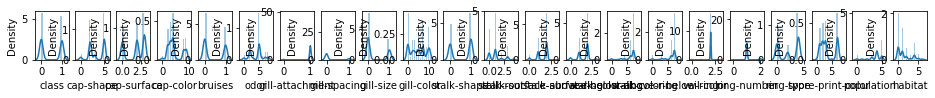

In [118]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(data[collist[i]])

All data ploting in one place with the help of distplot to check skewness in one place.

In [119]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

We already know maximum data is not normally distributed that's why here we are applying Power Transform method to remove skewness.

In [120]:
df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

checking skewness after applying Power Transform method.

In [121]:
df_new.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.035775,0.050170,-0.026740,1.185917,0.881477,0.162896,-0.438864,1.494683,-0.080699,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
1,1.035775,0.050170,1.563194,1.185917,-2.030416,0.162896,-0.438864,-0.669038,-0.080699,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,0.019064,-1.474856,0.116348
2,-2.027882,0.050170,1.305930,1.185917,-0.528118,0.162896,-0.438864,-0.669038,0.186585,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,0.019064,-1.474856,1.066339
3,1.035775,0.998646,1.305930,1.185917,0.881477,0.162896,-0.438864,1.494683,0.186585,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
4,1.035775,0.050170,-0.490015,-0.843230,0.417908,0.162896,2.278612,-0.669038,-0.080699,0.873511,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,-1.291192,0.019064,-2.108626,0.116348


In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dx=sc.fit_transform(df_new)
dx=pd.DataFrame(dx,columns=df_new.columns)
dx

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.035775,0.050170,-0.026740,1.185917,0.881477,0.162896,-0.438864,1.494683,-0.080699,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
1,1.035775,0.050170,1.563194,1.185917,-2.030416,0.162896,-0.438864,-0.669038,-0.080699,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,0.019064,-1.474856,0.116348
2,-2.027882,0.050170,1.305930,1.185917,-0.528118,0.162896,-0.438864,-0.669038,0.186585,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,0.019064,-1.474856,1.066339
3,1.035775,0.998646,1.305930,1.185917,0.881477,0.162896,-0.438864,1.494683,0.186585,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
4,1.035775,0.050170,-0.490015,-0.843230,0.417908,0.162896,2.278612,-0.669038,-0.080699,0.873511,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,-1.291192,0.019064,-2.108626,0.116348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.234089,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8120,1.035775,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,...,0.708807,0.553899,-0.939926,-0.902249,-5.190986,-0.200377,0.933807,-2.806195,0.154124,0.702479
8121,-0.851275,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,0.186585,-1.144806,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8122,-0.234089,0.998646,-0.026740,-0.843230,1.794391,0.162896,-0.438864,1.494683,-1.502261,0.873511,...,0.708807,-0.994621,0.765581,0.769774,0.098221,-0.200377,-1.291192,1.298625,0.154124,0.702479


Scale all the dependent variable into between -3 to 3 range.

In [123]:
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(dx)

Here apply PCA to reduce Column

In [124]:
Y.explained_variance_ratio_

array([0.19268168, 0.12835924, 0.11917559, 0.09691362, 0.07600818,
       0.06164265, 0.04632816, 0.04218325, 0.03558667, 0.03310851,
       0.02836454, 0.02472447, 0.02333307, 0.02084176, 0.01749223,
       0.01507954, 0.01216027, 0.00964153, 0.00788538, 0.00555217,
       0.00293747])

In [125]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 19.26816792,  32.10409235,  44.02165134,  53.71301358,
        61.31383178,  67.47809714,  72.11091275,  76.3292376 ,
        79.88790456,  83.19875586,  86.03520965,  88.50765622,
        90.84096277,  92.92513915,  94.67436228,  96.18231664,
        97.39834382,  98.36249706,  99.15103534,  99.70625252,
       100.        ])

In [126]:
FinalPCA=PCA(n_components=16)
FinalData=FinalPCA.fit_transform(dx)

Reduce column from 21 to 16 but approx 96% data available is here.

In [127]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.567038,1.721423,0.351001,-0.483946,1.286007,1.103608,-1.058105,0.931316,-0.970882,1.069885,-1.181505,0.500924,0.491503,0.276101,0.909203,-0.778293
1,-2.062892,1.323494,1.419062,-0.513371,1.642204,1.035434,-1.139529,0.031098,0.035497,-0.277404,0.649011,-1.348432,-0.642716,-0.511604,0.515512,-0.260525
2,-1.636320,1.717222,1.267452,-1.358945,1.588390,0.251938,1.733978,-0.361909,-0.379249,0.497616,-0.309196,-0.625887,-0.353347,-0.262363,0.667846,-0.226038
3,-0.784160,1.770254,0.624502,-0.686198,1.973918,1.459737,-0.989262,0.718511,-0.134994,0.372760,-1.824730,0.600284,0.210754,0.132254,0.810453,-0.363893
4,0.804612,1.802468,2.137859,0.176624,-1.811512,1.119590,-0.324481,1.387409,1.159350,0.583884,0.252505,-0.651397,0.405145,0.191899,-0.984705,-0.710590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-2.411220,-2.562850,-0.908615,-7.003364,-2.706635,1.875671,-0.237646,0.505280,-0.414148,-0.544741,-0.358089,-0.204577,0.699944,0.292227,0.513793,-0.214702
8120,-2.596571,-3.158235,-1.709899,-6.487853,-2.697715,2.024585,-1.557494,0.426310,-0.942429,-0.962509,-0.800429,0.602681,0.674563,0.379584,-0.620832,0.012887
8121,-1.892358,-2.741864,-0.904348,-7.051968,-2.398977,1.881895,0.325205,0.215332,-0.638910,-0.523444,-0.330660,-0.612337,0.441976,0.198687,0.236105,-0.958067
8122,3.809890,0.480119,-0.777032,-0.164631,0.536586,0.342749,0.277644,-0.077064,-0.193010,-0.542221,-1.423727,-0.242663,0.465760,0.059439,0.113057,0.011907


In [128]:
X=FinalData2

In [129]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.567038,1.721423,0.351001,-0.483946,1.286007,1.103608,-1.058105,0.931316,-0.970882,1.069885,-1.181505,0.500924,0.491503,0.276101,0.909203,-0.778293
1,-2.062892,1.323494,1.419062,-0.513371,1.642204,1.035434,-1.139529,0.031098,0.035497,-0.277404,0.649011,-1.348432,-0.642716,-0.511604,0.515512,-0.260525
2,-1.636320,1.717222,1.267452,-1.358945,1.588390,0.251938,1.733978,-0.361909,-0.379249,0.497616,-0.309196,-0.625887,-0.353347,-0.262363,0.667846,-0.226038
3,-0.784160,1.770254,0.624502,-0.686198,1.973918,1.459737,-0.989262,0.718511,-0.134994,0.372760,-1.824730,0.600284,0.210754,0.132254,0.810453,-0.363893
4,0.804612,1.802468,2.137859,0.176624,-1.811512,1.119590,-0.324481,1.387409,1.159350,0.583884,0.252505,-0.651397,0.405145,0.191899,-0.984705,-0.710590


checking data with new variable that is "X".

In [130]:
X.shape

(8124, 16)

In [131]:
y.shape

(8124,)

# Model Building

# Spliting the all data into X and y for model building.

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=43)

# Support Vector Classification

In [133]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9985080193957478
[[1349    4]
 [   0 1328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Support Vector Classification Algorithm performing very good and the score is 99%.

# Decision Tree Classifier

In [134]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9981350242446848
[[1351    2]
 [   3 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Decision Tree Classifier Algorithm performing very good and the score is 99%.

# KNN

In [135]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[1353    0]
 [   0 1328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



KNN Algorithm performing Excellent and the score is 100%.

In [136]:
#Importing AdaBoostClassifier
#Importing RandomForestClassifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier

In [138]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1353    0]
 [   0 1328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Random Forest Classifier Algorithm performing Excellent and the score is 100%.

# AdaBoostClassifer

In [139]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.9921671018276762
[[1345    8]
 [  13 1315]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1353
           1       0.99      0.99      0.99      1328

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



Ada Boost Classifier Algorithm performing very good and the score is 99%.

# Cross Validation

In [140]:
from sklearn.model_selection import cross_val_score

As we know after deployment all algorithms they are performing very well but there may be Overfiting and underfiting case. Remove Overfiting and UnderFiting we have to cross validate all algorithms.

In [141]:
svc=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVC:",svc.mean())

Cross Validation Score of SVC: 0.8617267904509284


After apply Cross validation on svc, the model score is 86%.

In [142]:
dtc=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DTC:",dtc.mean())

Cross Validation Score of DTC: 0.9153000378931413


After apply Cross validation on dtc, the model score is 91%.

In [143]:
knn=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNN:",knn.mean())

Cross Validation Score of KNN: 0.8792112163698371


After apply Cross validation on knn, the model score is 87%.

In [144]:
rf=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of RF:",rf.mean())

Cross Validation Score of RF: 0.883771807502842


After apply Cross validation on rf, the model score is 88%.

In [145]:
ad=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AD:",ad.mean())

Cross Validation Score of AD: 0.8821732474422129


After apply Cross validation on AdaBoost, the model score is 88%.

# Hyper parameter tuning

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
from sklearn import datasets
model = DecisionTreeClassifier()
grid_parameters = {'criterion':['gini','entropy']}
grid_sr = GridSearchCV(estimator=model,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
print(best_result)

0.9948553043807055


After hyper parameter tuining by GridSearchCV we find DecisionTreeClassifier Algorithm showing highest score.

# Saving Model

In [148]:
import joblib
joblib.dump(dtc,'Mushroom.obj')

['Mushroom.obj']